In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd
import numpy as np
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, fbeta_score

# 1. Load data

olist_customers_dataset

In [7]:
df_customer = pd.read_csv('./dataset/olist_customers_dataset.csv')

In [8]:
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


olist_geolocation_dataset

In [10]:
df_geo = pd.read_csv('./dataset/olist_geolocation_dataset.csv')

In [11]:
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [12]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


olist_order_items_dataset

In [13]:
df_order_item = pd.read_csv('./dataset/olist_order_items_dataset.csv')

In [14]:
df_order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [15]:
df_order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
df_order_item['shipping_limit_date'] = pd.to_datetime(df_order_item['shipping_limit_date'])

olist_order_payments_dataset

In [17]:
df_order_payment = pd.read_csv('./dataset/olist_order_payments_dataset.csv')

In [18]:
df_order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [19]:
df_order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


olist_order_reviews_dataset

In [20]:
df_order_review = pd.read_csv('./dataset/olist_order_reviews_dataset.csv')

In [21]:
df_order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [22]:
df_order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [23]:
df_order_review['review_creation_date'] = pd.to_datetime(df_order_review['review_creation_date'])
df_order_review['review_answer_timestamp'] = pd.to_datetime(df_order_review['review_answer_timestamp'])

olist_orders_dataset

In [24]:
df_order = pd.read_csv('./dataset/olist_orders_dataset.csv')

In [25]:
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [26]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [27]:
df_order['order_purchase_timestamp'] = pd.to_datetime(df_order['order_purchase_timestamp'])
df_order['order_approved_at'] = pd.to_datetime(df_order['order_approved_at'])
df_order['order_delivered_carrier_date'] = pd.to_datetime(df_order['order_delivered_carrier_date'])
df_order['order_delivered_customer_date'] = pd.to_datetime(df_order['order_delivered_customer_date'])
df_order['order_estimated_delivery_date'] = pd.to_datetime(df_order['order_estimated_delivery_date'])

olist_products_dataset

In [28]:
df_product = pd.read_csv('./dataset/olist_products_dataset.csv')

In [29]:
df_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [30]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


olist_sellers_dataset

In [31]:
df_seller = pd.read_csv('./dataset/olist_sellers_dataset.csv')

In [32]:
df_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [33]:
df_seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


product_category_name_translation

In [34]:
df_cat_name = pd.read_csv('./dataset/product_category_name_translation.csv')

In [35]:
df_cat_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [36]:
df_cat_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


olist_age

In [37]:
df_age = pd.read_csv('./dataset/olist_age.csv')

In [38]:
df_age.head()

,customer_id,age
0,00012a2ce6f8dcda20d059ce98491703,61
1,000161a058600d5901f007fab4c27140,49
2,0001fd6190edaaf884bcaf3d49edf079,71
3,0002414f95344307404f0ace7a26f1d5,68
4,000379cdec625522490c315e70c7a9fb,61


In [39]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  98666 non-null  object
 1   age          98666 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


# 2. Feature engineering

1. customer_id

In [40]:
df_customer_unique_id = duckdb.query("""
select distinct customer_unique_id
from df_customer
""").to_df()

In [41]:
df_customer_unique_id.head()

,customer_unique_id
0,57b2a98a409812fe9618067b6b8ebe4f
1,21f748a16f4e1688a9014eb3ee6fa325
2,a96d5cfa0d3181817e2b946f921ea021
3,9c0096673baf55453a50073f12d1a37f
4,e9dd12dca17352644a959d9dea133935


2. master date

In [42]:
duckdb.query("""
select min(order_purchase_timestamp) min_order_purchase_yyyymm
, max(order_purchase_timestamp) max_order_purchase_yyyymm
from df_order
""").to_df()

,min_order_purchase_yyyymm,max_order_purchase_yyyymm
0,2016-09-04 21:15:19,2018-10-17 17:30:18


In [43]:
date_range = pd.date_range(start='2016-09-04', end='2018-10-17', freq='M')

In [44]:
formatted_dates = date_range.strftime('%Y%m')

In [45]:
df_master_date = pd.DataFrame(formatted_dates, columns=['yyyymm'])

In [46]:
df_master_date = duckdb.query("""
select distinct case when cast(right(yyyymm,2) as int) between 1 and 3 then cast(left(yyyymm,4) as int)*100 + 1
when cast(right(yyyymm,2) as int) between 4 and 6 then cast(left(yyyymm,4) as int)*100 + 2
when cast(right(yyyymm,2) as int) between 7 and 9 then cast(left(yyyymm,4) as int)*100 + 3
when cast(right(yyyymm,2) as int) between 10 and 12 then cast(left(yyyymm,4) as int)*100 + 4
end yyyyqq
, yyyymm
from df_master_date
""").to_df()

In [47]:
df_master_date.head()

,yyyyqq,yyyymm
0,201603,201609
1,201701,201702
2,201702,201705
3,201704,201712
4,201701,201703


3. signal

In [48]:
df_signal = duckdb.query("""
select customer_unique_id, yyyymm_signal
, max(case when cat_new = 'home and kitchen' then 1 else 0 end) pur_home
, max(case when cat_new = 'fashion and accessories' then 1 else 0 end) pur_fashion
, max(case when cat_new = 'electronics and gadgets' then 1 else 0 end) pur_elec
, max(case when cat_new = 'tools and construction' then 1 else 0 end) pur_tools
, max(case when cat_new = 'health, beauty, and hygiene' then 1 else 0 end) pur_health_beauty
, max(case when cat_new = 'books, music, and entertainment' then 1 else 0 end) pur_book_music
, max(case when cat_new = 'toys and leisure' then 1 else 0 end) pur_toy
, max(case when cat_new = 'miscellaneous' then 1 else 0 end) pur_others
from
    (
    select *
    , year(order_purchase_timestamp)*100 + month(order_purchase_timestamp) yyyymm_signal
    , case when e.product_category_name_english in ('housewares', 'kitchen_dining_laundry_garden_furniture', 'home_confort', 'home_construction', 'home_appliances', 'home_appliances_2', 'bed_bath_table', 'furniture_bedroom', 'furniture_living_room', 'furniture_decor', 'furniture_mattress_and_upholstery', 'small_appliances', 'small_appliances_home_oven_and_coffee', 'garden_tools', 'home_comfort_2') then 'home and kitchen'
    when e.product_category_name_english in ('fashion_bags_accessories', 'fashion_male_clothing', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'fashion_shoes', 'fashio_female_clothing') then 'fashion and accessories'
    when e.product_category_name_english in ('electronics', 'fixed_telephony', 'consoles_games', 'audio', 'tablets_printing_image', 'computers_accessories', 'telephony', 'computers') then 'electronics and gadgets'
    when e.product_category_name_english in ('costruction_tools_garden', 'costruction_tools_tools', 'construction_tools_safety', 'construction_tools_lights', 'construction_tools_construction') then 'tools and construction'
    when e.product_category_name_english in ('health_beauty', 'diapers_and_hygiene') then 'health, beauty, and hygiene'
    when e.product_category_name_english in ('books_general_interest', 'books_imported', 'books_technical', 'music', 'cds_dvds_musicals', 'dvds_blu_ray', 'cine_photo') then 'books, music, and entertainment'
    when e.product_category_name_english in ('baby', 'sports_leisure', 'toys') then 'toys and leisure'
    else 'miscellaneous' end cat_new
    from df_order a
    left join df_customer b
    on a.customer_id = b.customer_id
    left join df_order_item c
    on a.order_id = c.order_id
    left join df_product d
    on c.product_id = d.product_id
    left join df_cat_name e
    on d.product_category_name = e.product_category_name
    where a.order_status not in ('unavailable','canceled')
    ) a
group by customer_unique_id, yyyymm_signal
""").to_df()

In [49]:
df_signal.head()

,customer_unique_id,yyyymm_signal,pur_home,pur_fashion,pur_elec,pur_tools,pur_health_beauty,pur_book_music,pur_toy,pur_others
0,2a46fb94aef5cbeeb850418118cee090,201802,0,0,1,0,0,0,0,0
1,918dc87cd72cd9f6ed4bd442ed785235,201709,0,0,0,0,0,0,0,1
2,cd076285a12f40041b32f5ad8c98699f,201703,0,0,0,0,0,0,0,1
3,67d21c8bea9d6017d1b124d3879dd815,201803,0,0,0,0,0,0,0,1
4,9dbb05f5577e862337b93feb8f358839,201808,0,0,0,0,1,0,0,0


4. age

In [50]:
df_customer_age = duckdb.query("""
select customer_unique_id
, cast(year(birthday)*100 + month(birthday) as int) yyyymm_birthday
from                          
    (
    select customer_unique_id
    , date_add(cast('2018-10-17' as date),-age_day) birthday
    from                           
        (
        select b.customer_unique_id
        , min(a.age) age
        , cast(min(a.age)*365.25 as int) age_day
        from df_age a
        left join df_customer b
        on a.customer_id = b.customer_id
        group by b.customer_unique_id
        ) a
    ) b
""").to_df()

In [51]:
df_customer_age.head()

,customer_unique_id,yyyymm_birthday
0,14843983d4a159080f6afe4b7f346e7c,197510
1,ed5340f0e2a52fffa065298aeb875e60,196510
2,dbedaa0402e0dfa8b90fb9557424c5fc,195010
3,589621a1ce8b9302b75d6920dfd7dd01,199710
4,74c286ab8cc161142213780711964b06,195110


5. customer address

In [52]:
df_customer_address = duckdb.query("""
select customer_unique_id
, case when customer_state in ('AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO') then 1 else 0 end address_north
, case when customer_state in ('AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE') then 1 else 0 end address_northeast
, case when customer_state in ('DF', 'GO', 'MT', 'MS') then 1 else 0 end address_centralwest
, case when customer_state in ('ES', 'MG', 'RJ', 'SP') then 1 else 0 end address_southeast
, case when customer_state in ('PR', 'RS', 'SC') then 1 else 0 end address_south
from
    (
    select customer_unique_id, customer_state, customer_city, customer_zip_code_prefix
    , row_number() over(partition by customer_unique_id order by customer_zip_code_prefix) rn
    from df_customer
    ) a
where rn = 1
""").to_df()

In [53]:
df_customer_address.head()

,customer_unique_id,address_north,address_northeast,address_centralwest,address_southeast,address_south
0,0004bd2a26a76fe21f786e4fbd80607f,0,0,0,1,0
1,00090324bbad0e9342388303bb71ba0a,0,0,0,1,0
2,000d460961d6dbfa3ec6c9f5805769e1,0,0,0,1,0
3,0028a7d8db7b0247652509358ad8d755,0,0,0,1,0
4,002d71b244beb91ca7030b15ab526446,0,0,0,1,0


6. number of purchase

In [54]:
df_no_purchase = duckdb.query("""
select customer_unique_id, yyyymm_order
, count(distinct case when cat_new = 'fashion and accessories' then order_id else null end) no_pur_home
, count(distinct case when cat_new = 'electronics and gadgets' then order_id else null end) no_pur_fashion
, count(distinct case when cat_new = 'tools and construction' then order_id else null end) no_pur_tools
, count(distinct case when cat_new = 'health, beauty, and hygiene' then order_id else null end) no_pur_health_beauty
, count(distinct case when cat_new = 'books, music, and entertainment' then order_id else null end) no_pur_book_music
, count(distinct case when cat_new = 'toys and leisure' then order_id else null end) no_pur_toy
, count(distinct case when cat_new = 'miscellaneous' then order_id else null end) no_pur_others
from
    (
    select *
    , year(order_purchase_timestamp)*100 + month(order_purchase_timestamp) yyyymm_order
    , case when e.product_category_name_english in ('housewares', 'kitchen_dining_laundry_garden_furniture', 'home_confort', 'home_construction', 'home_appliances', 'home_appliances_2', 'bed_bath_table', 'furniture_bedroom', 'furniture_living_room', 'furniture_decor', 'furniture_mattress_and_upholstery', 'small_appliances', 'small_appliances_home_oven_and_coffee', 'garden_tools', 'home_comfort_2') then 'home and kitchen'
    when e.product_category_name_english in ('fashion_bags_accessories', 'fashion_male_clothing', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'fashion_shoes', 'fashio_female_clothing') then 'fashion and accessories'
    when e.product_category_name_english in ('electronics', 'fixed_telephony', 'consoles_games', 'audio', 'tablets_printing_image', 'computers_accessories', 'telephony', 'computers') then 'electronics and gadgets'
    when e.product_category_name_english in ('costruction_tools_garden', 'costruction_tools_tools', 'construction_tools_safety', 'construction_tools_lights', 'construction_tools_construction') then 'tools and construction'
    when e.product_category_name_english in ('health_beauty', 'diapers_and_hygiene') then 'health, beauty, and hygiene'
    when e.product_category_name_english in ('books_general_interest', 'books_imported', 'books_technical', 'music', 'cds_dvds_musicals', 'dvds_blu_ray', 'cine_photo') then 'books, music, and entertainment'
    when e.product_category_name_english in ('baby', 'sports_leisure', 'toys') then 'toys and leisure'
    else 'miscellaneous' end cat_new
    from df_order a
    left join df_customer b
    on a.customer_id = b.customer_id
    left join df_order_item c
    on a.order_id = c.order_id
    left join df_product d
    on c.product_id = d.product_id
    left join df_cat_name e
    on d.product_category_name = e.product_category_name
    where a.order_status not in ('unavailable','canceled')
    ) a
group by customer_unique_id, yyyymm_order
""").to_df()

In [55]:
df_no_purchase.head()

,customer_unique_id,yyyymm_order,no_pur_home,no_pur_fashion,no_pur_tools,no_pur_health_beauty,no_pur_book_music,no_pur_toy,no_pur_others
0,2eac18b475d7d985f0ab52b9c010f59f,201711,0,0,0,0,0,0,0
1,760caff27799b863021f2591c828dad7,201805,0,0,0,0,0,0,0
2,ee301c76bd2b939da9740c6f5eb280c6,201705,0,0,0,1,0,0,0
3,6fa9f081d9c0b44b00b3d343c2a4e2c5,201802,0,0,0,0,0,1,0
4,a8397e4402779864503796dd87fdbedc,201801,0,0,0,0,0,0,1


7. amount purchase

In [56]:
df_amt_purchase = duckdb.query("""
select customer_unique_id, yyyymm_order
, sum(case when cat_new = 'fashion and accessories' then price_new + freight_value_new else 0 end) amt_pur_home
, sum(case when cat_new = 'electronics and gadgets' then price_new + freight_value_new else 0 end) amt_pur_fashion
, sum(case when cat_new = 'tools and construction' then price_new + freight_value_new else 0 end) amt_pur_tools
, sum(case when cat_new = 'health, beauty, and hygiene' then price_new + freight_value_new else 0 end) amt_pur_health_beauty
, sum(case when cat_new = 'books, music, and entertainment' then price_new + freight_value_new else 0 end) amt_pur_book_music
, sum(case when cat_new = 'toys and leisure' then price_new + freight_value_new else 0 end) amt_pur_toy
, sum(case when cat_new = 'miscellaneous' then price_new + freight_value_new else 0 end) amt_pur_others
from
    (
    select *
    , year(order_purchase_timestamp)*100 + month(order_purchase_timestamp) yyyymm_order
    , case when e.product_category_name_english in ('housewares', 'kitchen_dining_laundry_garden_furniture', 'home_confort', 'home_construction', 'home_appliances', 'home_appliances_2', 'bed_bath_table', 'furniture_bedroom', 'furniture_living_room', 'furniture_decor', 'furniture_mattress_and_upholstery', 'small_appliances', 'small_appliances_home_oven_and_coffee', 'garden_tools', 'home_comfort_2') then 'home and kitchen'
    when e.product_category_name_english in ('fashion_bags_accessories', 'fashion_male_clothing', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'fashion_shoes', 'fashio_female_clothing') then 'fashion and accessories'
    when e.product_category_name_english in ('electronics', 'fixed_telephony', 'consoles_games', 'audio', 'tablets_printing_image', 'computers_accessories', 'telephony', 'computers') then 'electronics and gadgets'
    when e.product_category_name_english in ('costruction_tools_garden', 'costruction_tools_tools', 'construction_tools_safety', 'construction_tools_lights', 'construction_tools_construction') then 'tools and construction'
    when e.product_category_name_english in ('health_beauty', 'diapers_and_hygiene') then 'health, beauty, and hygiene'
    when e.product_category_name_english in ('books_general_interest', 'books_imported', 'books_technical', 'music', 'cds_dvds_musicals', 'dvds_blu_ray', 'cine_photo') then 'books, music, and entertainment'
    when e.product_category_name_english in ('baby', 'sports_leisure', 'toys') then 'toys and leisure'
    else 'miscellaneous' end cat_new
    , case when price is null then 0 else price end price_new
    , case when freight_value is null then 0 else 0 end freight_value_new
    from df_order a
    left join df_customer b
    on a.customer_id = b.customer_id
    left join df_order_item c
    on a.order_id = c.order_id
    left join df_product d
    on c.product_id = d.product_id
    left join df_cat_name e
    on d.product_category_name = e.product_category_name
    where a.order_status not in ('unavailable','canceled')
    ) a
group by customer_unique_id, yyyymm_order
""").to_df()

In [57]:
df_amt_purchase.head()

,customer_unique_id,yyyymm_order,amt_pur_home,amt_pur_fashion,amt_pur_tools,amt_pur_health_beauty,amt_pur_book_music,amt_pur_toy,amt_pur_others
0,861eff4711a542e4b93843c6dd7febb0,201705,0.0,0.0,0.0,0.0,0.0,0.0,124.99
1,3151a81801c8386361b62277d7fa5ecf,201804,0.0,0.0,0.0,84.0,0.0,0.0,0.00
2,2e6a42a9b5cbb0da62988694f18ee295,201705,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,ef07ba9aa5226f77264ffa5762b2280b,201803,0.0,0.0,0.0,0.0,0.0,30.5,0.00
4,07d190f123147d9e89d4b922543d7948,201807,0.0,0.0,0.0,0.0,0.0,0.0,199.98


8. payment channel

In [58]:
df_payment_channel = duckdb.query("""
select customer_unique_id
, yyyymm_order
, count(distinct case when payment_type = 'credit_card' then order_id else null end) payment_credit
, count(distinct case when payment_type = 'debit_card' then order_id else null end) payment_debit
, count(distinct case when payment_type = 'boleto' then order_id else null end) payment_ticket
, count(distinct case when payment_type = 'voucher' then order_id else null end) payment_voucher
from
    (
    select *
    , year(order_purchase_timestamp)*100 + month(order_purchase_timestamp) yyyymm_order                                             
    from df_order a
    left join df_customer b
    on a.customer_id = b.customer_id
    left join df_order_payment c
    on a.order_id = c.order_id
    where a.order_status not in ('unavailable','canceled')
    ) a
group by customer_unique_id, yyyymm_order
""").to_df()

In [59]:
df_payment_channel.head()

,customer_unique_id,yyyymm_order,payment_credit,payment_debit,payment_ticket,payment_voucher
0,43676e9993577d1991036ea6720213de,201806,1,0,0,0
1,3cf7c427d21f1f414a8bfceac52e4c58,201711,1,0,0,0
2,99e36749c5c84dc56b13138caac13b55,201806,0,0,1,0
3,26a2b0baec2ef2e226f1297de4b6a86f,201808,1,0,0,0
4,9ccbb5f759db041b2db8359d71c0547f,201712,1,0,0,0


9. merge

In [60]:
df = duckdb.query("""
select a.customer_unique_id, b.yyyymm, b.yyyyqq
, pur_home, pur_fashion, pur_elec, pur_tools, pur_health_beauty, pur_book_music, pur_toy, pur_others
, ((cast(b.yyyymm as int)//100)*12+(cast(b.yyyymm as int)%100)) - ((yyyymm_birthday//100)*12+(yyyymm_birthday%100)) age_month
, address_north, address_northeast, address_centralwest, address_southeast, address_south
, no_pur_home, no_pur_fashion, no_pur_tools, no_pur_health_beauty, no_pur_book_music, no_pur_toy, no_pur_others
, amt_pur_home, amt_pur_fashion, amt_pur_tools, amt_pur_health_beauty, amt_pur_book_music, amt_pur_toy, amt_pur_others
, payment_credit, payment_debit, payment_ticket, payment_voucher
from df_customer_unique_id a        
left join df_master_date b
on 1=1
left join df_signal c
on a.customer_unique_id = c.customer_unique_id
and b.yyyymm = c.yyyymm_signal          
left join df_customer_age d
on a.customer_unique_id = d.customer_unique_id
left join df_customer_address e
on a.customer_unique_id = e.customer_unique_id
left join df_no_purchase f
on a.customer_unique_id = f.customer_unique_id
and b.yyyymm = f.yyyymm_order
left join df_amt_purchase g
on a.customer_unique_id = g.customer_unique_id
and b.yyyymm = g.yyyymm_order            
left join df_payment_channel h
on a.customer_unique_id = h.customer_unique_id
and b.yyyymm = h.yyyymm_order   
where d.yyyymm_birthday is not null
""").to_df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [61]:
df.fillna(0, inplace=True)

10. group by quarter

In [62]:
df = duckdb.query("""                    
select customer_unique_id, yyyyqq
, max(pur_home) as pur_home
, max(pur_fashion) as pur_fashion
, max(pur_elec) as pur_elec
, max(pur_tools) as pur_tools
, max(pur_health_beauty) as pur_health_beauty
, max(pur_book_music) as pur_book_music
, max(pur_toy) as pur_toy
, max(pur_others) as pur_others
, avg(age_month) as age_month
, max(address_north) as address_north
, max(address_northeast) as address_northeast
, max(address_centralwest) as address_centralwest
, max(address_southeast) as address_southeast
, max(address_south) as address_south
, sum(no_pur_home) as no_pur_home
, sum(no_pur_fashion) as no_pur_fashion
, sum(no_pur_tools) as no_pur_tools
, sum(no_pur_health_beauty) as no_pur_health_beauty
, sum(no_pur_book_music) as no_pur_book_music
, sum(no_pur_toy) as no_pur_toy
, sum(no_pur_others) as no_pur_others
, sum(amt_pur_home) as amt_pur_home
, sum(amt_pur_fashion) as amt_pur_fashion
, sum(amt_pur_tools) as amt_pur_tools
, sum(amt_pur_health_beauty) as amt_pur_health_beauty
, sum(amt_pur_book_music) as amt_pur_book_music
, sum(amt_pur_toy) as amt_pur_toy
, sum(amt_pur_others) as amt_pur_others
, sum(payment_credit) as payment_credit
, sum(payment_debit) as payment_debit
, sum(payment_ticket) as payment_ticket
, sum(payment_voucher) as payment_voucher
from
    (
    select *
    from df
    ) a                    
group by customer_unique_id, yyyyqq
""").to_df()

11. lead target

In [63]:
df = duckdb.query("""
select *
, lead(pur_home) over (partition by customer_unique_id order by yyyyqq) as lead_pur_home
, lead(pur_fashion) over (partition by customer_unique_id order by yyyyqq) as lead_pur_fashion
, lead(pur_elec) over (partition by customer_unique_id order by yyyyqq) as lead_pur_elec
, lead(pur_tools) over (partition by customer_unique_id order by yyyyqq) as lead_pur_tools
, lead(pur_health_beauty) over (partition by customer_unique_id order by yyyyqq) as lead_pur_health_beauty
, lead(pur_book_music) over (partition by customer_unique_id order by yyyyqq) as lead_pur_book_music
, lead(pur_toy) over (partition by customer_unique_id order by yyyyqq) as lead_pur_toy
, lead(pur_others) over (partition by customer_unique_id order by yyyyqq) as lead_pur_others
from
    (
    select *
    from df
    ) a
""").to_df()

11. create rolling avg and sum

In [64]:
df = duckdb.query("""    
select *
, case when count(payment_ticket) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) < 2 then null
else avg(no_pur_home) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) end as avg_2_no_pur_home
, case when count(payment_ticket) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) < 2 then null
else avg(no_pur_fashion) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) end as avg_2_no_pur_fashion
, case when count(payment_ticket) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) < 2 then null
else avg(no_pur_tools) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) end as avg_2_no_pur_tools
, case when count(payment_ticket) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) < 2 then null
else avg(no_pur_health_beauty) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) end as avg_2_no_pur_health_beauty
, case when count(payment_ticket) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) < 2 then null
else avg(no_pur_book_music) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) end as avg_2_no_pur_book_music
, case when count(payment_ticket) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) < 2 then null
else avg(no_pur_toy) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) end as avg_2_no_pur_toy
, case when count(payment_ticket) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) < 2 then null
else avg(no_pur_others) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) end as avg_2_no_pur_others
, case when count(payment_ticket) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) < 2 then null

else avg(amt_pur_home) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) end as avg_2_amt_pur_home
, case when count(payment_ticket) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) < 2 then null
else avg(amt_pur_fashion) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) end as avg_2_amt_pur_fashion
, case when count(payment_ticket) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) < 2 then null
else avg(amt_pur_tools) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) end as avg_2_amt_pur_tools
, case when count(payment_ticket) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) < 2 then null
else avg(amt_pur_health_beauty) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) end as avg_2_amt_pur_health_beauty
, case when count(payment_ticket) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) < 2 then null
else avg(amt_pur_book_music) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) end as avg_2_amt_pur_book_music
, case when count(payment_ticket) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) < 2 then null
else avg(amt_pur_toy) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) end as avg_2_amt_pur_toy
, case when count(payment_ticket) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) < 2 then null
else avg(amt_pur_others) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) end as avg_2_amt_pur_others

, case when count(payment_ticket) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) < 2 then null
else avg(payment_credit) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) end as avg_2_payment_credit
, case when count(payment_ticket) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) < 2 then null
else avg(payment_debit) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) end as avg_2_payment_debit
, case when count(payment_ticket) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) < 2 then null
else avg(payment_ticket) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) end as avg_2_payment_ticket
, case when count(payment_ticket) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) < 2 then null
else avg(payment_voucher) over (partition by customer_unique_id order by yyyyqq rows between 1 preceding and current row) end as avg_2_payment_voucher

from df
""").to_df()

In [65]:
df.dropna(inplace=True)

12. datetime feature

In [66]:
df = duckdb.query("""    
select *
, yyyyqq//100 - 2016 as year_running
, yyyyqq%100 as quarter
from df
""").to_df()

12. drop unnecessary columns

In [67]:
df = duckdb.query("""    
select customer_unique_id, yyyyqq

-- Purchase target
, lead_pur_home
, lead_pur_fashion
, lead_pur_elec
, lead_pur_tools
, lead_pur_health_beauty
, lead_pur_book_music
, lead_pur_toy
, lead_pur_others                        

-- Age
, age_month

-- Address columns
, address_north
, address_northeast
, address_centralwest
, address_southeast
, address_south

-- Number of purchases
, no_pur_home
, no_pur_fashion
, no_pur_tools
, no_pur_health_beauty
, no_pur_book_music
, no_pur_toy
, no_pur_others

-- Amount of purchases
, amt_pur_home
, amt_pur_fashion
, amt_pur_tools
, amt_pur_health_beauty
, amt_pur_book_music
, amt_pur_toy
, amt_pur_others

-- Payment methods
, payment_credit
, payment_debit
, payment_ticket
, payment_voucher

-- Average purchases
, avg_2_no_pur_home
, avg_2_no_pur_fashion
, avg_2_no_pur_tools
, avg_2_no_pur_health_beauty
, avg_2_no_pur_book_music
, avg_2_no_pur_toy
, avg_2_no_pur_others

-- Average amount of purchases
, avg_2_amt_pur_home
, avg_2_amt_pur_fashion
, avg_2_amt_pur_tools
, avg_2_amt_pur_health_beauty
, avg_2_amt_pur_book_music
, avg_2_amt_pur_toy
, avg_2_amt_pur_others

-- Average payment methods
, avg_2_payment_credit
, avg_2_payment_debit
, avg_2_payment_ticket
, avg_2_payment_voucher

-- Datetime
, year_running
, quarter

from df
""").to_df()

In [68]:
df.head()

,customer_unique_id,yyyyqq,lead_pur_home,lead_pur_fashion,lead_pur_elec,lead_pur_tools,lead_pur_health_beauty,lead_pur_book_music,lead_pur_toy,lead_pur_others,...,avg_2_amt_pur_health_beauty,avg_2_amt_pur_book_music,avg_2_amt_pur_toy,avg_2_amt_pur_others,avg_2_payment_credit,avg_2_payment_debit,avg_2_payment_ticket,avg_2_payment_voucher,year_running,quarter
0,002ae492472e45ad6ebeb7a625409392,201604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
1,002ae492472e45ad6ebeb7a625409392,201701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,002ae492472e45ad6ebeb7a625409392,201702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
3,002ae492472e45ad6ebeb7a625409392,201703,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
4,002ae492472e45ad6ebeb7a625409392,201704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.99,0.0,0.0,0.0,0.5,0.0,0.0,0.0,1,4


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667940 entries, 0 to 667939
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   customer_unique_id           667940 non-null  object 
 1   yyyyqq                       667940 non-null  int32  
 2   lead_pur_home                667940 non-null  float64
 3   lead_pur_fashion             667940 non-null  float64
 4   lead_pur_elec                667940 non-null  float64
 5   lead_pur_tools               667940 non-null  float64
 6   lead_pur_health_beauty       667940 non-null  float64
 7   lead_pur_book_music          667940 non-null  float64
 8   lead_pur_toy                 667940 non-null  float64
 9   lead_pur_others              667940 non-null  float64
 10  age_month                    667940 non-null  float64
 11  address_north                667940 non-null  int32  
 12  address_northeast            667940 non-null  int32  
 13 

In [70]:
df.isna().sum()

customer_unique_id             0
yyyyqq                         0
lead_pur_home                  0
lead_pur_fashion               0
lead_pur_elec                  0
lead_pur_tools                 0
lead_pur_health_beauty         0
lead_pur_book_music            0
lead_pur_toy                   0
lead_pur_others                0
age_month                      0
address_north                  0
address_northeast              0
address_centralwest            0
address_southeast              0
address_south                  0
no_pur_home                    0
no_pur_fashion                 0
no_pur_tools                   0
no_pur_health_beauty           0
no_pur_book_music              0
no_pur_toy                     0
no_pur_others                  0
amt_pur_home                   0
amt_pur_fashion                0
amt_pur_tools                  0
amt_pur_health_beauty          0
amt_pur_book_music             0
amt_pur_toy                    0
amt_pur_others                 0
payment_cr

# 3. Exploratory data analysis (EDA)

list of columns by types

In [71]:
df.columns.tolist()

['customer_unique_id',
 'yyyyqq',
 'lead_pur_home',
 'lead_pur_fashion',
 'lead_pur_elec',
 'lead_pur_tools',
 'lead_pur_health_beauty',
 'lead_pur_book_music',
 'lead_pur_toy',
 'lead_pur_others',
 'age_month',
 'address_north',
 'address_northeast',
 'address_centralwest',
 'address_southeast',
 'address_south',
 'no_pur_home',
 'no_pur_fashion',
 'no_pur_tools',
 'no_pur_health_beauty',
 'no_pur_book_music',
 'no_pur_toy',
 'no_pur_others',
 'amt_pur_home',
 'amt_pur_fashion',
 'amt_pur_tools',
 'amt_pur_health_beauty',
 'amt_pur_book_music',
 'amt_pur_toy',
 'amt_pur_others',
 'payment_credit',
 'payment_debit',
 'payment_ticket',
 'payment_voucher',
 'avg_2_no_pur_home',
 'avg_2_no_pur_fashion',
 'avg_2_no_pur_tools',
 'avg_2_no_pur_health_beauty',
 'avg_2_no_pur_book_music',
 'avg_2_no_pur_toy',
 'avg_2_no_pur_others',
 'avg_2_amt_pur_home',
 'avg_2_amt_pur_fashion',
 'avg_2_amt_pur_tools',
 'avg_2_amt_pur_health_beauty',
 'avg_2_amt_pur_book_music',
 'avg_2_amt_pur_toy',
 'avg_2

In [72]:
target_col = ['lead_pur_home','lead_pur_fashion','lead_pur_elec','lead_pur_tools','lead_pur_health_beauty',
              'lead_pur_book_music','lead_pur_toy', 'lead_pur_others']

In [73]:
cat_col = [ 'address_north','address_northeast','address_centralwest','address_southeast','address_south']

In [74]:
num_col = ['age_month',
 'no_pur_home',
 'no_pur_fashion',
 'no_pur_tools',
 'no_pur_health_beauty',
 'no_pur_book_music',
 'no_pur_toy',
 'no_pur_others',
 'amt_pur_home',
 'amt_pur_fashion',
 'amt_pur_tools',
 'amt_pur_health_beauty',
 'amt_pur_book_music',
 'amt_pur_toy',
 'amt_pur_others',
 'payment_credit',
 'payment_debit',
 'payment_ticket',
 'payment_voucher',
 'avg_2_no_pur_home',
 'avg_2_no_pur_fashion',
 'avg_2_no_pur_tools',
 'avg_2_no_pur_health_beauty',
 'avg_2_no_pur_book_music',
 'avg_2_no_pur_toy',
 'avg_2_no_pur_others',
 'avg_2_amt_pur_home',
 'avg_2_amt_pur_fashion',
 'avg_2_amt_pur_tools',
 'avg_2_amt_pur_health_beauty',
 'avg_2_amt_pur_book_music',
 'avg_2_amt_pur_toy',
 'avg_2_amt_pur_others',
 'avg_2_payment_credit',
 'avg_2_payment_debit',
 'avg_2_payment_ticket',
 'avg_2_payment_voucher',
 'year_running',
 'quarter']

target

In [75]:
df[target_col].describe()

,lead_pur_home,lead_pur_fashion,lead_pur_elec,lead_pur_tools,lead_pur_health_beauty,lead_pur_book_music,lead_pur_toy,lead_pur_others
count,667940.000000,667940.000000,667940.000000,667940.000000,667940.000000,667940.000000,667940.000000,667940.000000
mean,0.041444,0.003502,0.022535,0.002150,0.012989,0.001467,0.021183,0.040114
std,0.199315,0.059072,0.148416,0.046317,0.113228,0.038276,0.143994,0.196228
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
# imbalance data

category feature

In [77]:
df[cat_col].describe()

,address_north,address_northeast,address_centralwest,address_southeast,address_south
count,667940.000000,667940.000000,667940.000000,667940.000000,667940.000000
mean,0.018665,0.095148,0.058248,0.685496,0.142444
std,0.135338,0.293419,0.234212,0.464318,0.349505
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


numeric feature

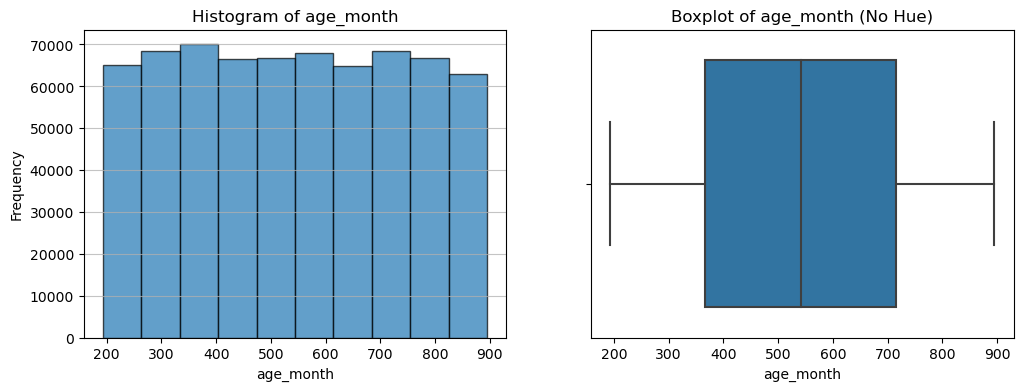

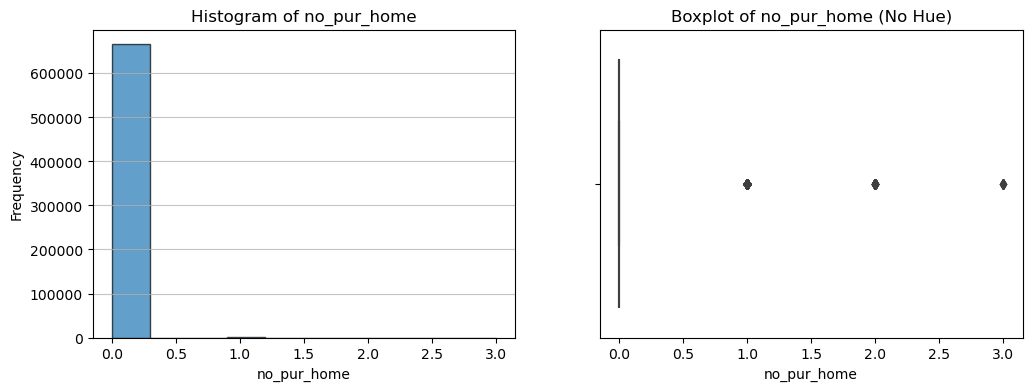

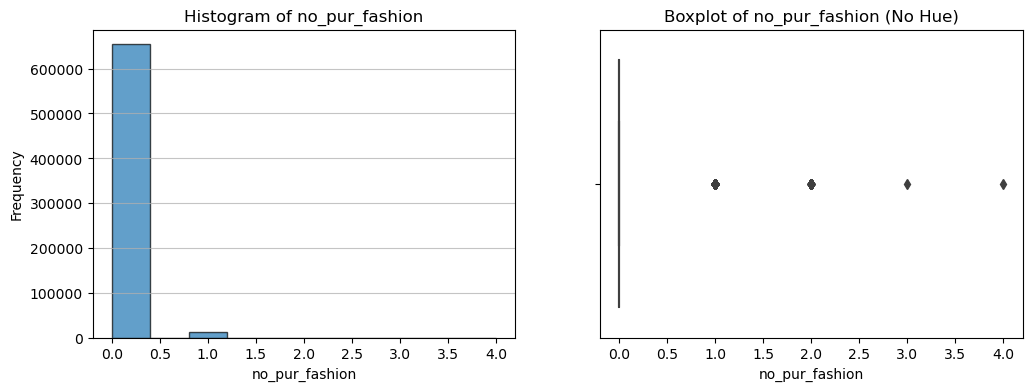

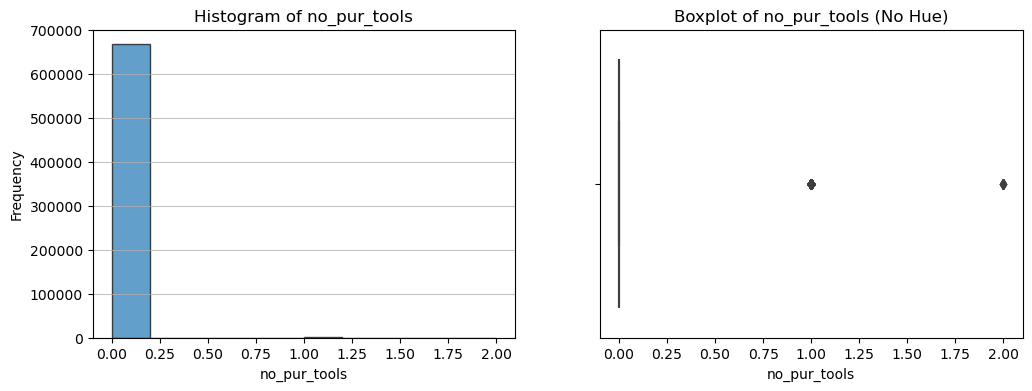

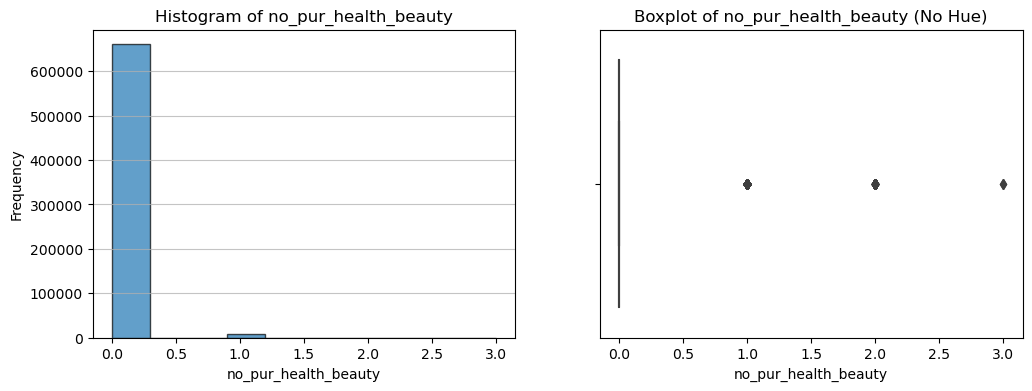

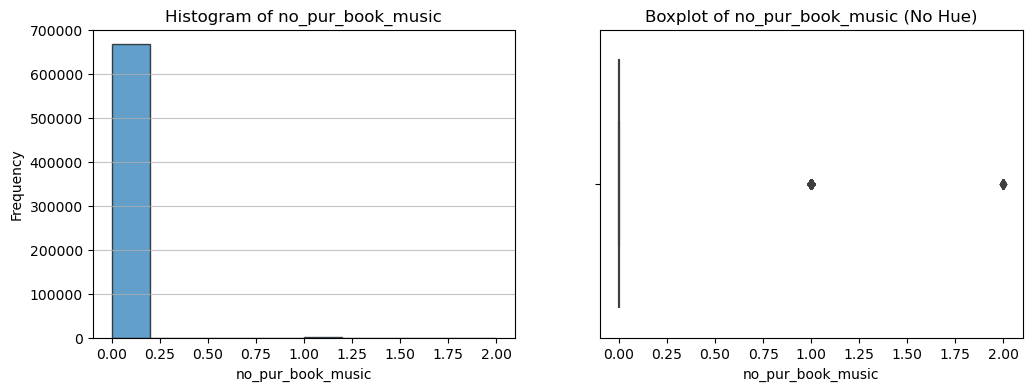

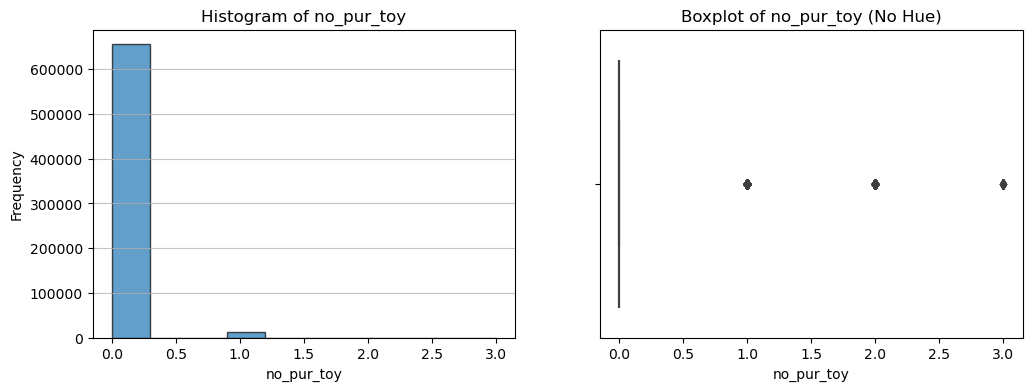

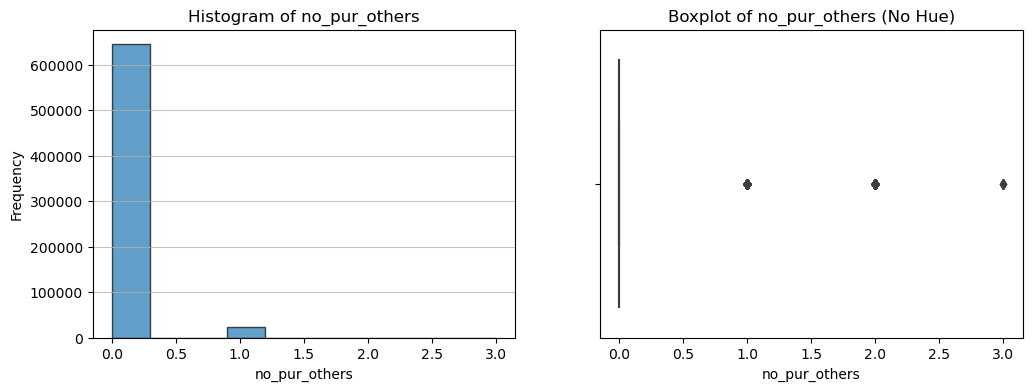

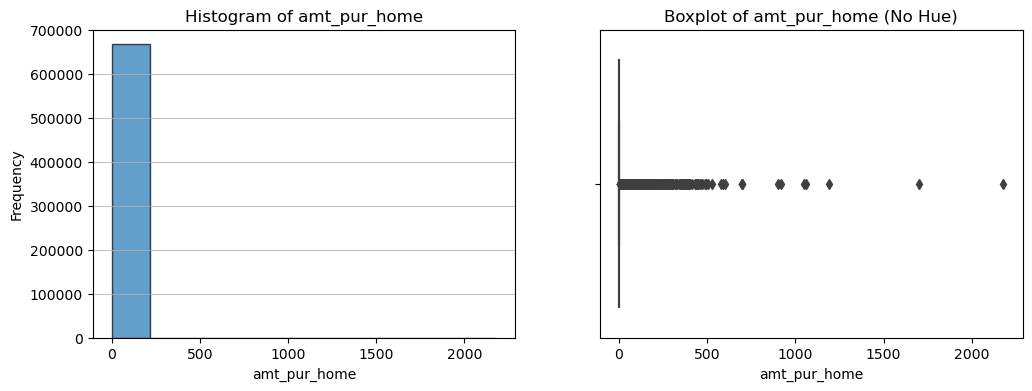

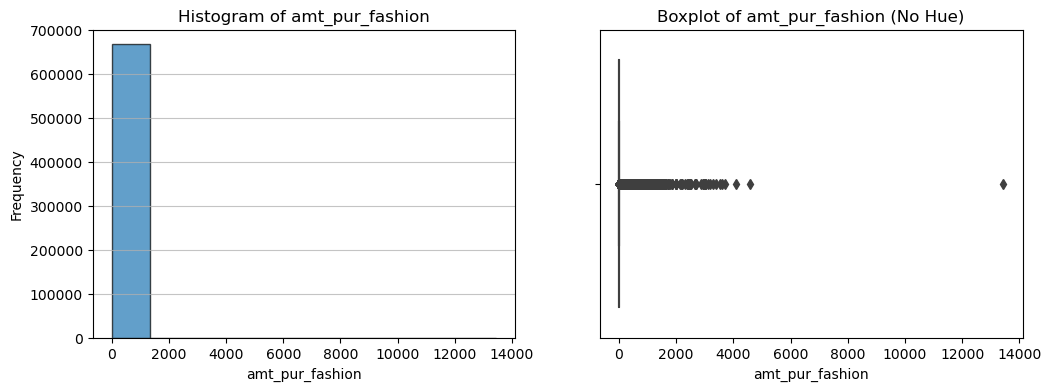

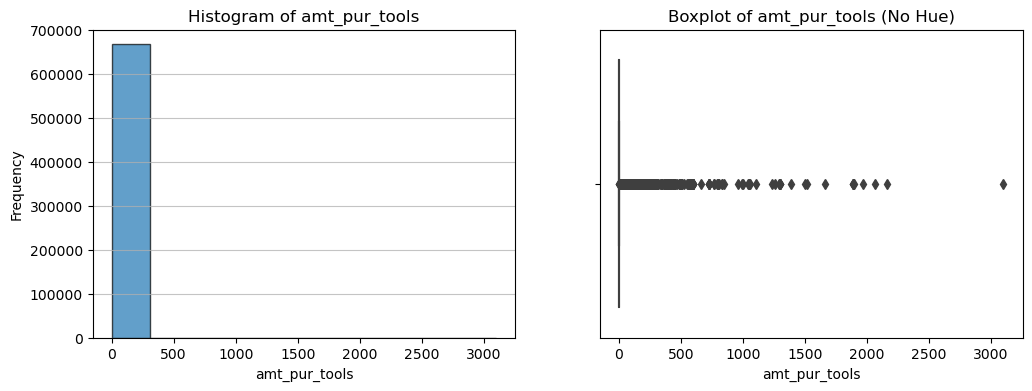

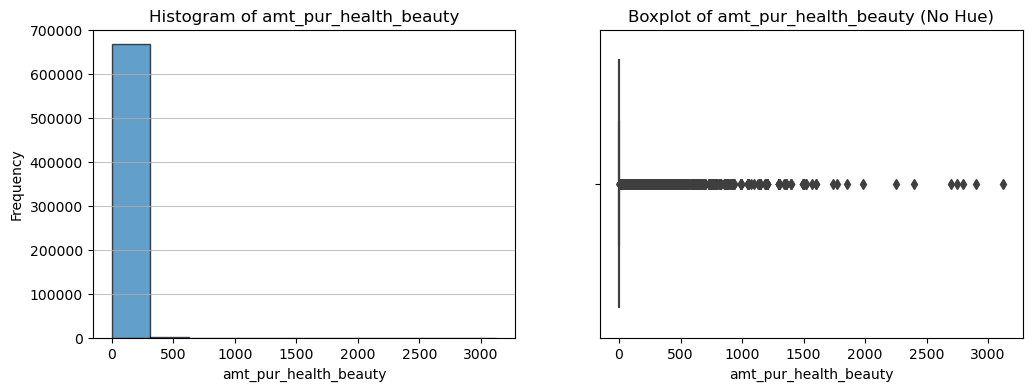

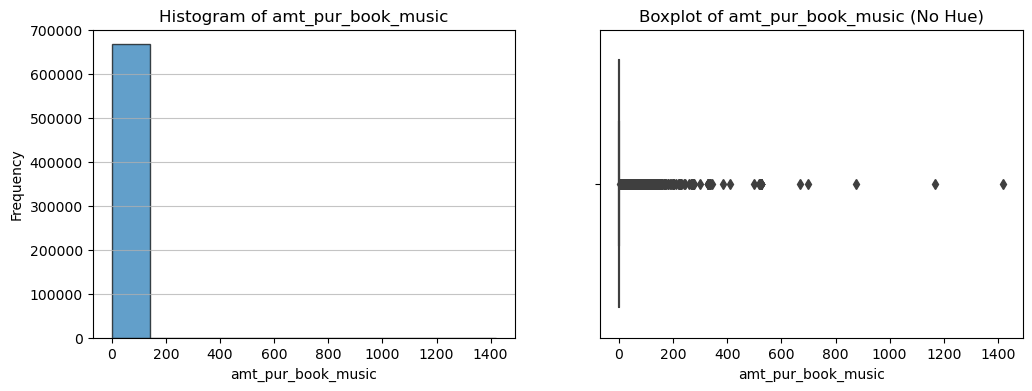

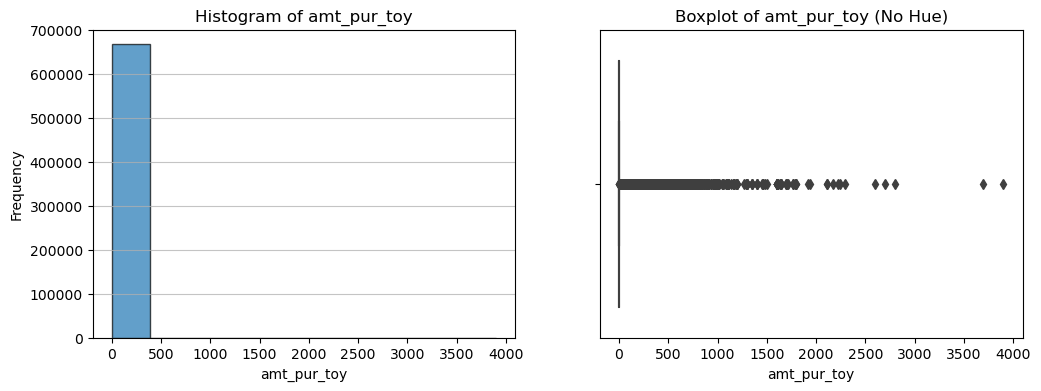

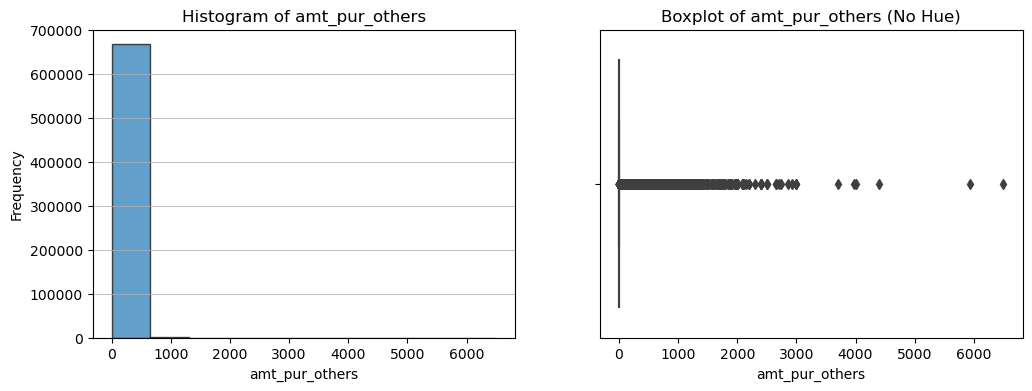

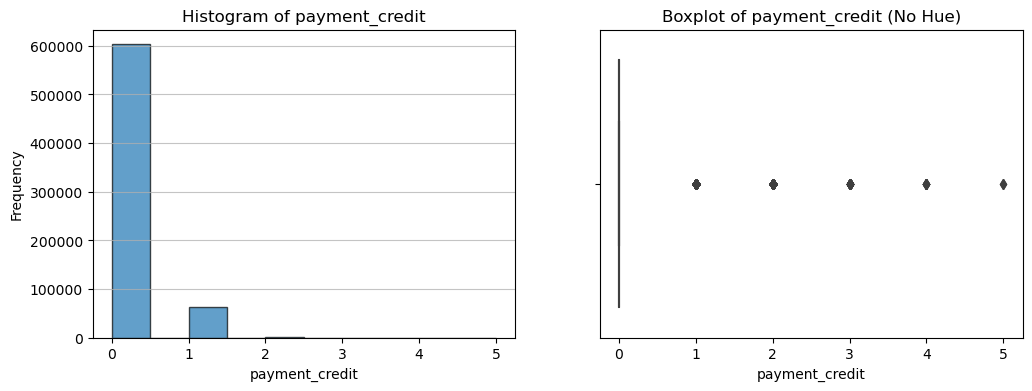

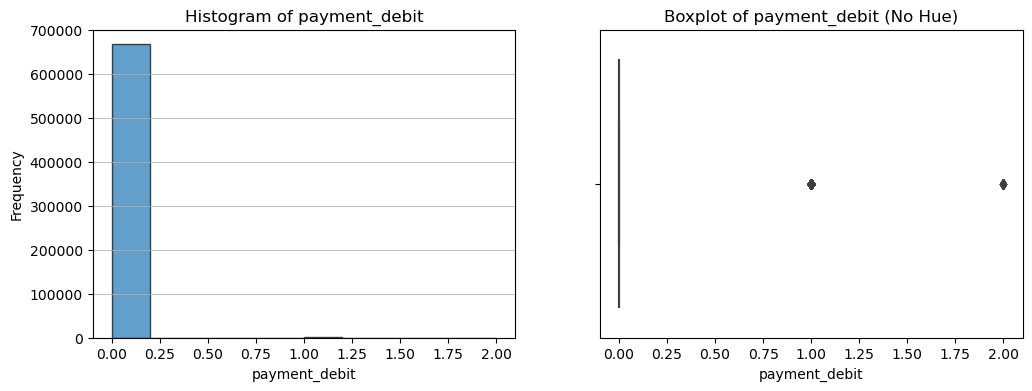

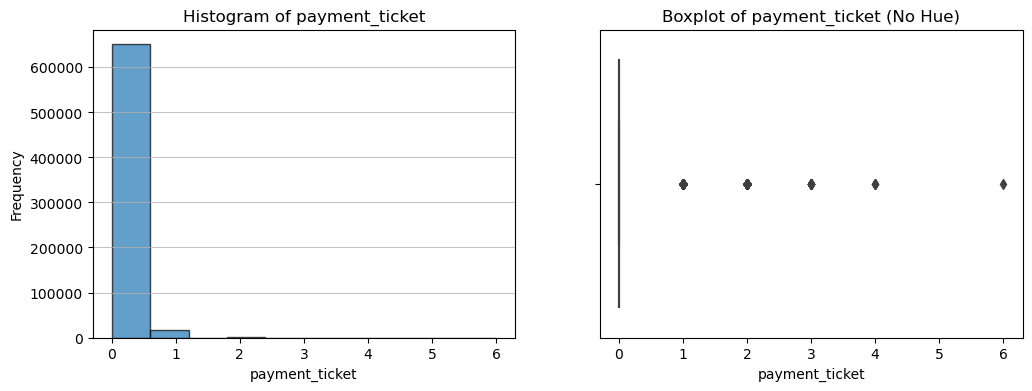

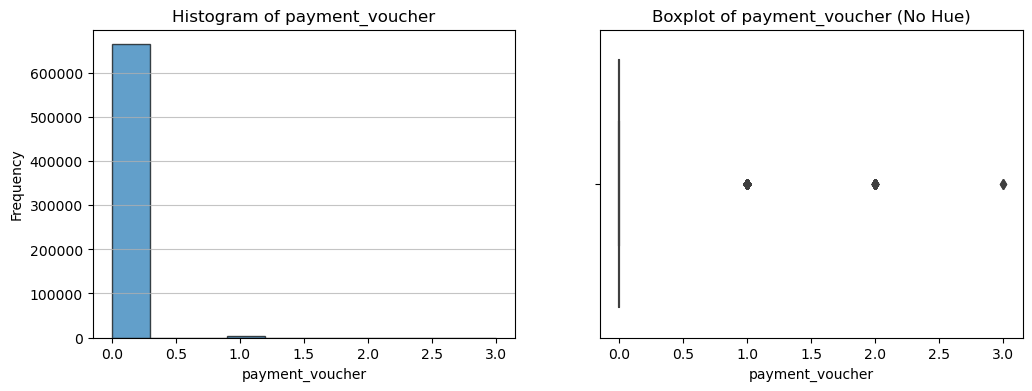

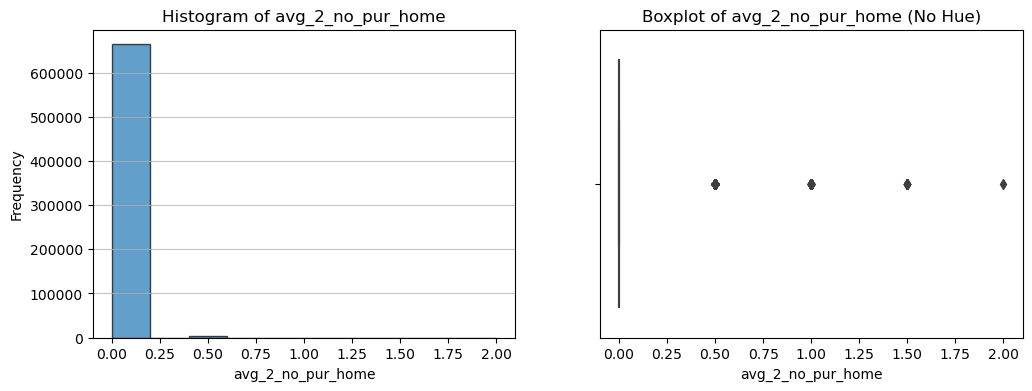

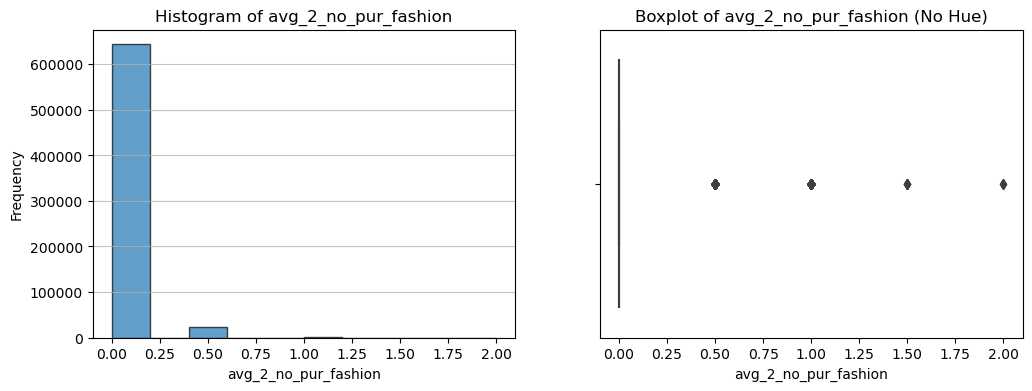

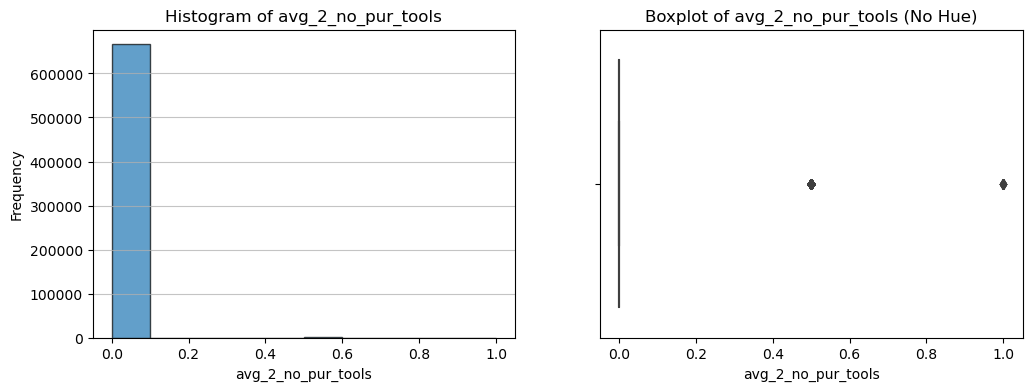

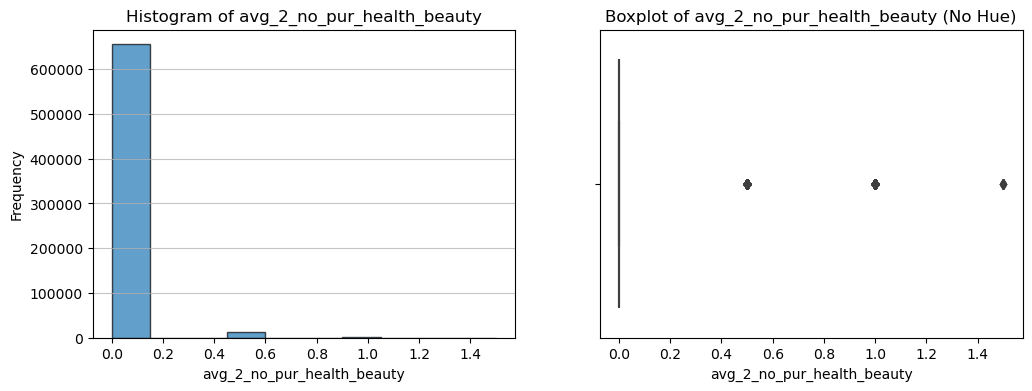

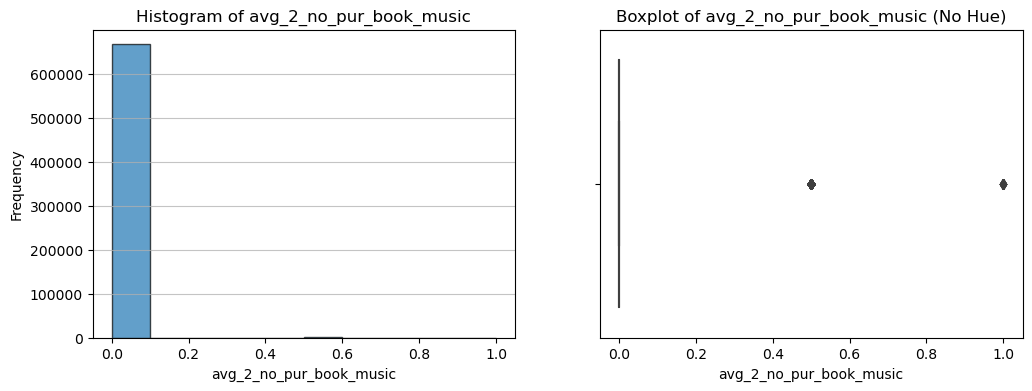

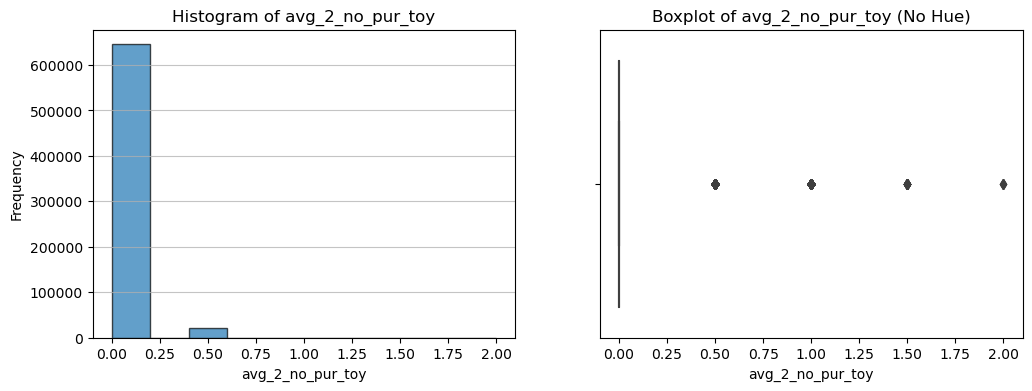

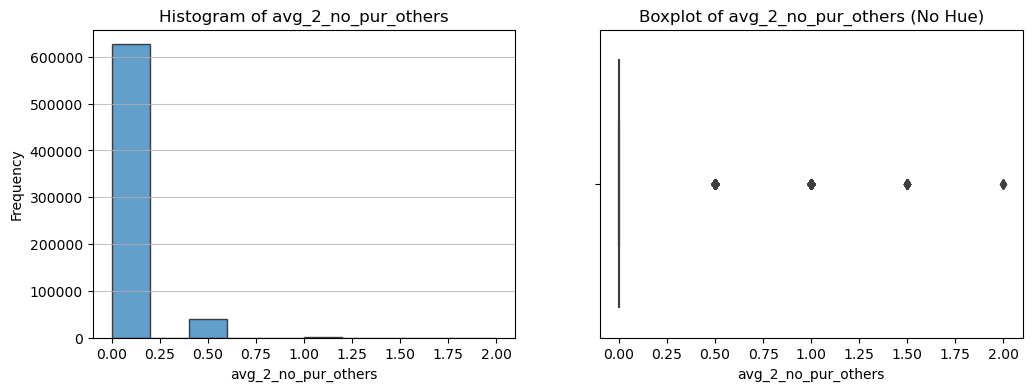

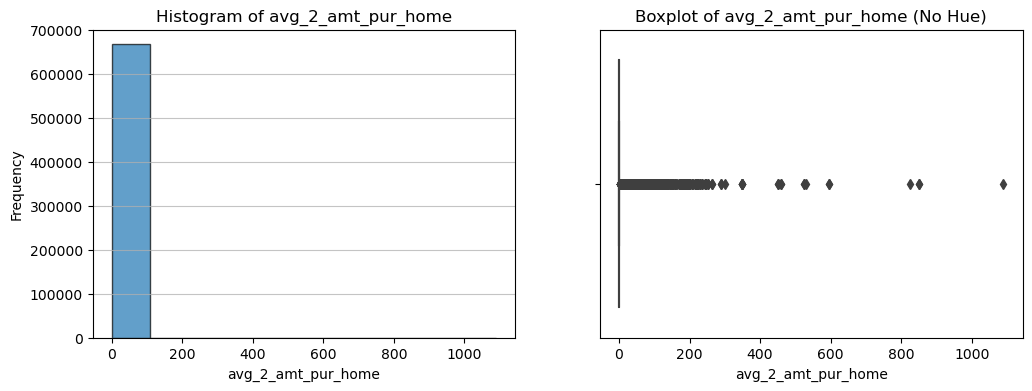

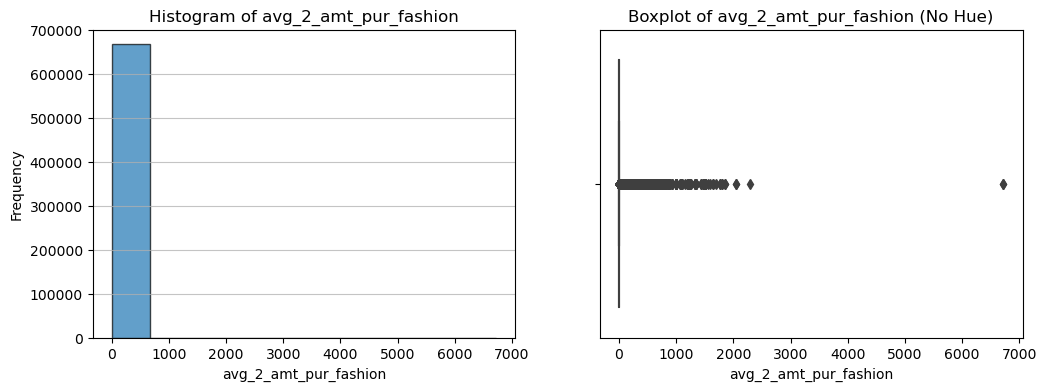

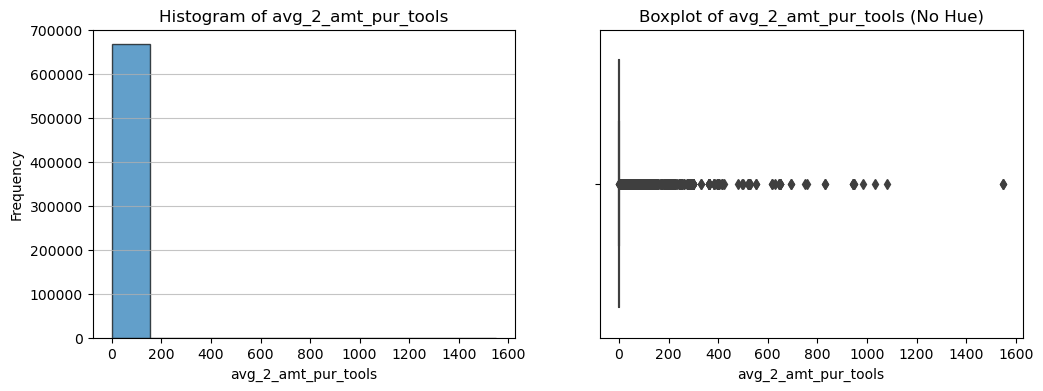

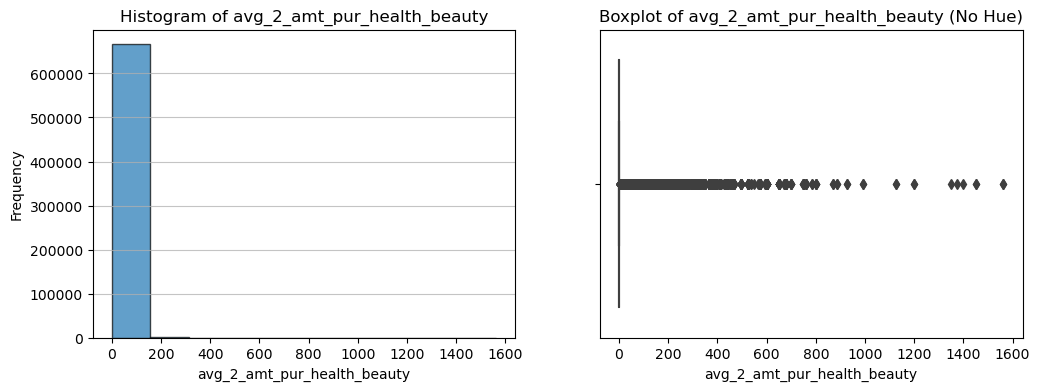

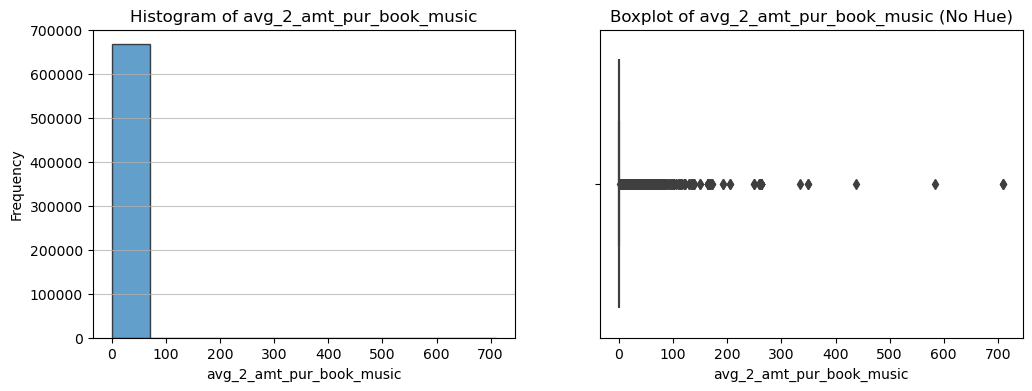

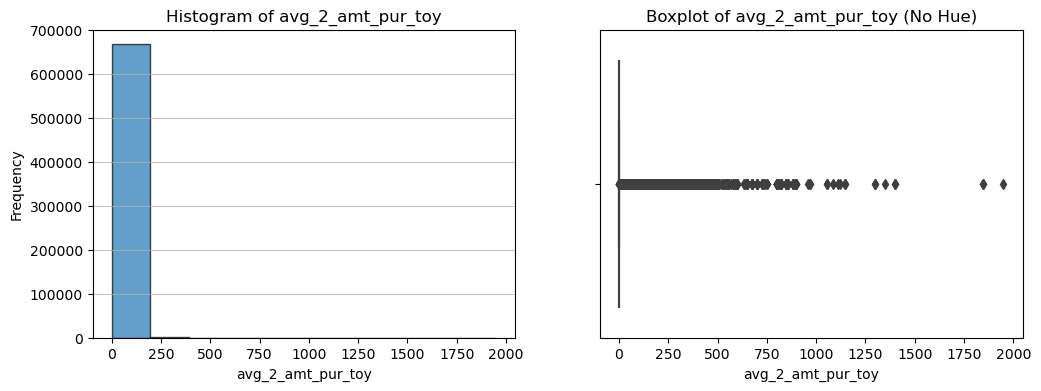

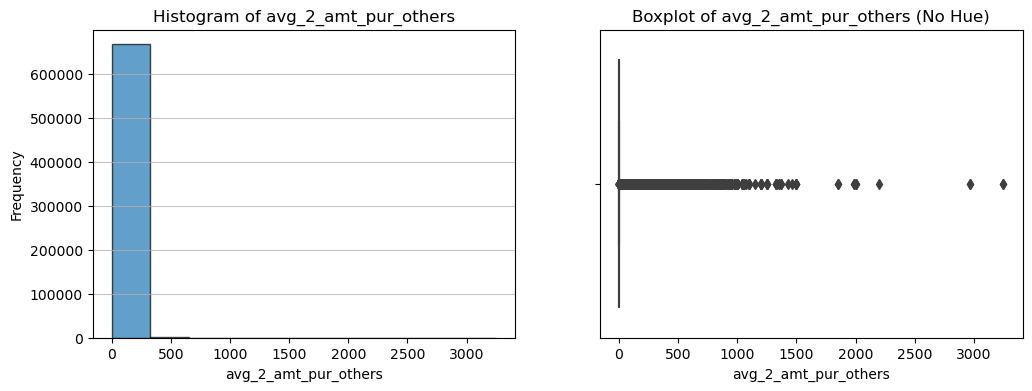

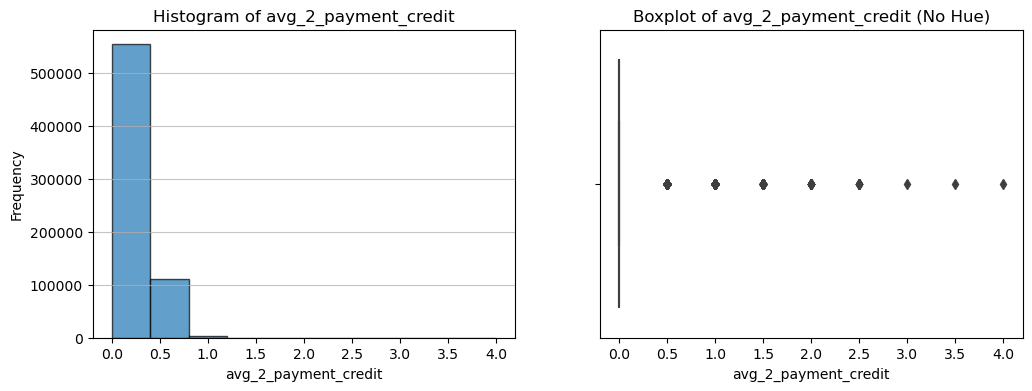

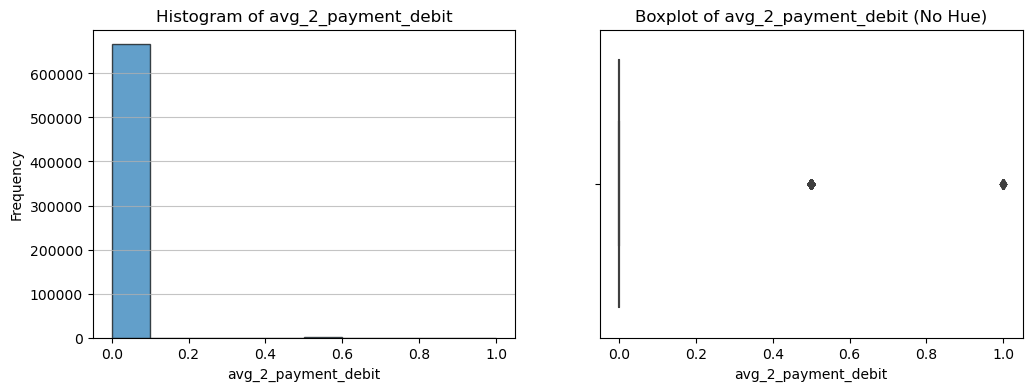

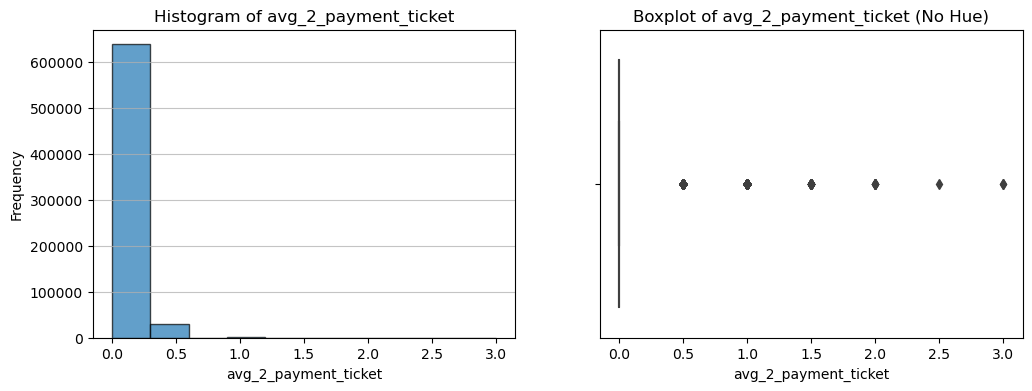

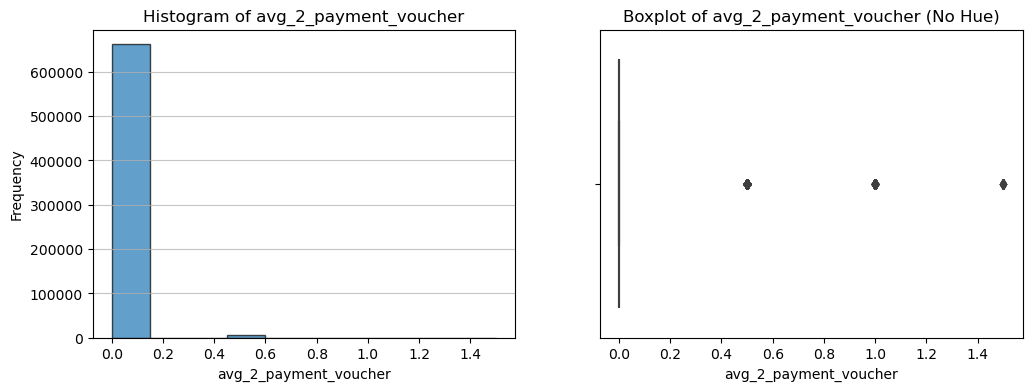

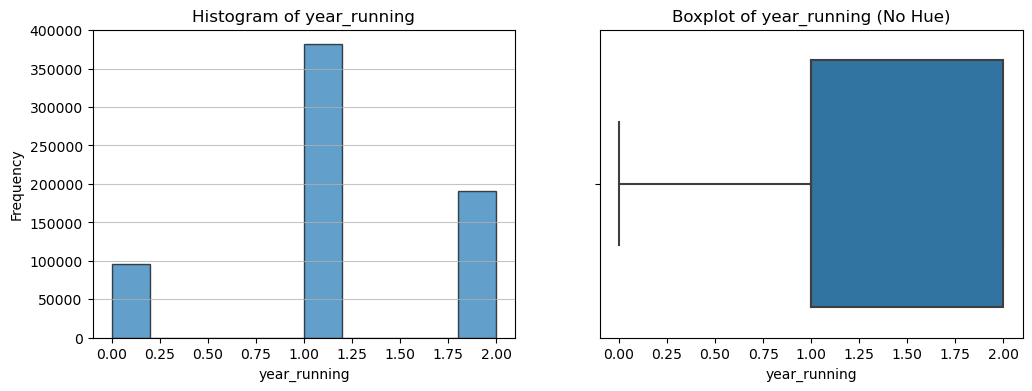

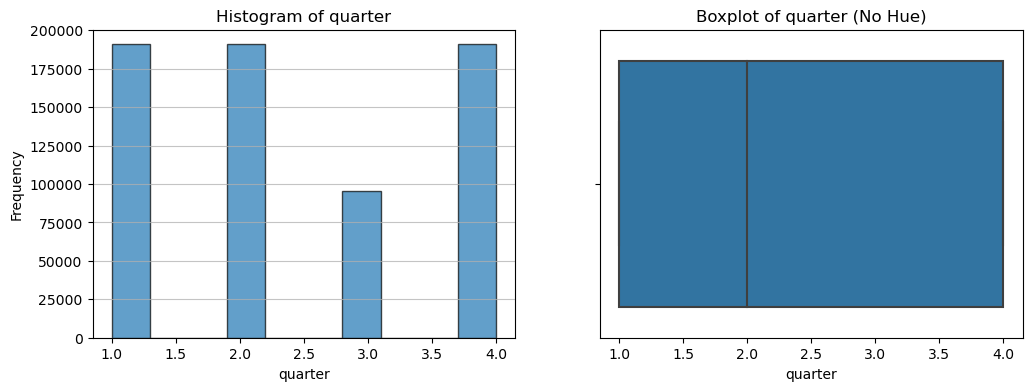

In [78]:
for column_name in num_col:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.hist(df[column_name], bins=10, edgecolor='black', alpha=0.7)
    ax1.set_title(f'Histogram of {column_name}')
    ax1.set_xlabel(column_name)
    ax1.set_ylabel('Frequency')
    ax1.grid(axis='y', alpha=0.75)
    
    if isinstance(df[column_name].dtype, pd.CategoricalDtype):
        sns.boxplot(x=df[column_name], ax=ax2)
    else:
        sns.boxplot(x=df[column_name], ax=ax2)
    ax2.set_title(f'Boxplot of {column_name} (No Hue)')
    ax2.set_xlabel(column_name)
    
    plt.show()

drop unnecessary columns

In [79]:
df.drop(columns = ['customer_unique_id'], inplace = True)

correlation

In [80]:
corr = df[target_col + cat_col + num_col].corr()

<Axes: >

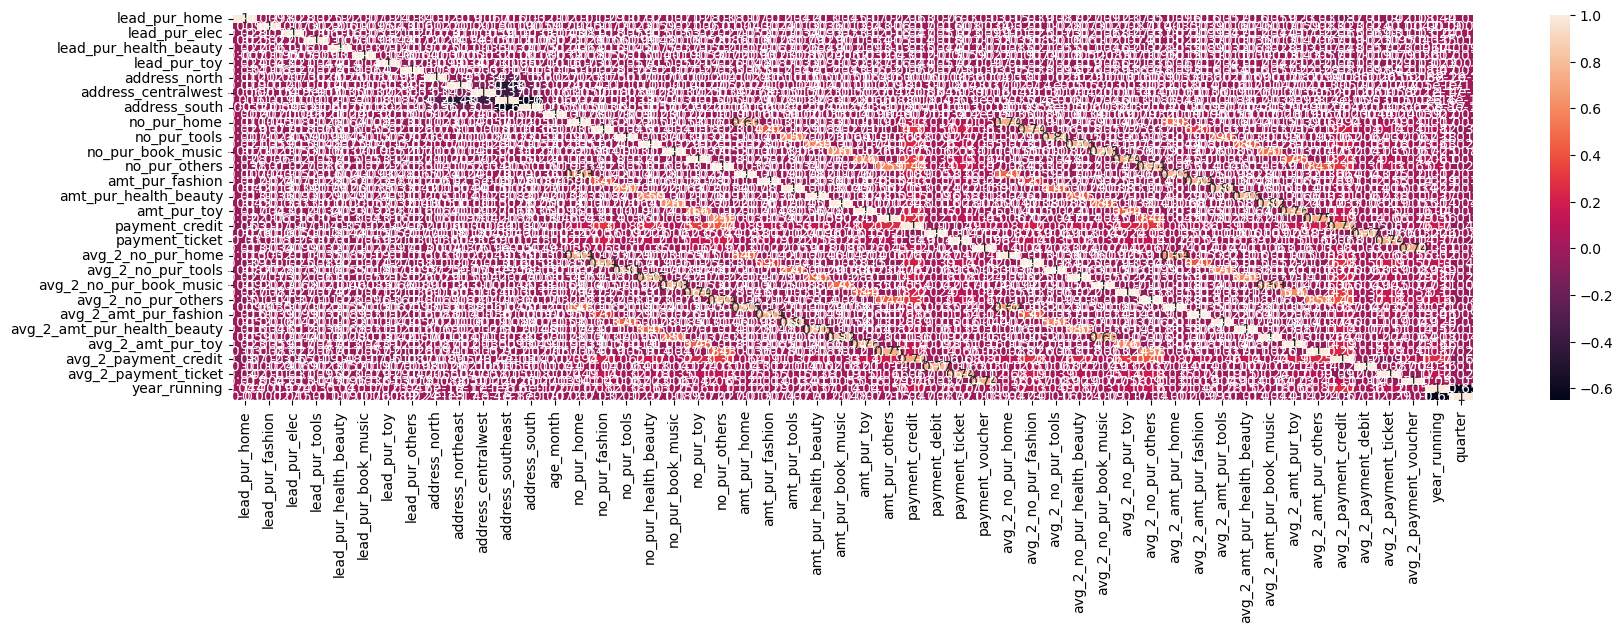

In [81]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(corr, annot=True, ax=ax)

# 4. Model

train test split

In [82]:
df['yyyyqq'].unique()

array([201604, 201701, 201702, 201703, 201704, 201801, 201802])

In [83]:
train_period = [201604, 201701, 201702, 201703, 201704]
test_period = [201801, 201802]

In [84]:
df_train = df[df['yyyyqq'].isin(train_period)]
df_test = df[df['yyyyqq'].isin(test_period)]

1. home model

In [85]:
X_train_home = df_train[num_col + cat_col]
X_test_home = df_test[num_col + cat_col]
y_train_home = df_train['lead_pur_home']
y_test_home = df_test['lead_pur_home']

In [86]:
scaler_home = StandardScaler()
X_train_home_scaled = scaler_home.fit_transform(X_train_home)
X_test_home_scaled = scaler_home.transform(X_test_home)

In [87]:
smote_home = SMOTE(random_state=42)
X_train_home_scaled_smote, y_train_home_smote = smote_home.fit_resample(X_train_home_scaled, y_train_home)

In [88]:
model_home = LogisticRegression(random_state=42, max_iter=2000)
model_home.fit(X_train_home_scaled_smote, y_train_home_smote)

LogisticRegression(max_iter=2000, random_state=42)

In [89]:
y_pred_home = model_home.predict(X_test_home_scaled)
y_prob_home =  model_home.predict_proba(X_test_home_scaled)[:, 1]

In [90]:
precision_home = precision_score(y_test_home, y_pred_home, average='binary')
recall_home = recall_score(y_test_home, y_pred_home, average='binary')
auc_roc_home = roc_auc_score(y_test_home, y_prob_home)

In [91]:
print(f'Precision: {precision_home}')
print(f'Recall: {recall_home}')
print(f'AUC-ROC: {auc_roc_home}')

Precision: 0.08059416519964617
Recall: 0.9823849685064588
AUC-ROC: 0.6870666905766696


2. fashion model

In [92]:
X_train_fashion = df_train[num_col + cat_col]
X_test_fashion = df_test[num_col + cat_col]
y_train_fashion = df_train['lead_pur_fashion']
y_test_fashion = df_test['lead_pur_fashion']

In [93]:
scaler_fashion = StandardScaler()
X_train_fashion_scaled = scaler_fashion.fit_transform(X_train_fashion)
X_test_fashion_scaled = scaler_fashion.transform(X_test_fashion)

In [94]:
smote_fashion = SMOTE(random_state=42)
X_train_fashion_scaled_smote, y_train_fashion_smote = smote_fashion.fit_resample(X_train_fashion_scaled, y_train_fashion)

In [95]:
model_fashion = LogisticRegression(random_state=42, max_iter=2000)
model_fashion.fit(X_train_fashion_scaled_smote, y_train_fashion_smote)

LogisticRegression(max_iter=2000, random_state=42)

In [96]:
y_pred_fashion = model_fashion.predict(X_test_fashion_scaled)
y_prob_fashion =  model_fashion.predict_proba(X_test_fashion_scaled)[:, 1]

In [97]:
precision_fashion = precision_score(y_test_fashion, y_pred_fashion, average='binary')
recall_fashion = recall_score(y_test_fashion, y_pred_fashion, average='binary')
auc_roc_fashion = roc_auc_score(y_test_fashion, y_prob_fashion)

In [98]:
print(f'Precision: {precision_fashion}')
print(f'Recall: {recall_fashion}')
print(f'AUC-ROC: {auc_roc_fashion}')

Precision: 0.004596765302054975
Recall: 0.9713261648745519
AUC-ROC: 0.6551008625605633


3. elec model

In [99]:
X_train_elec = df_train[num_col + cat_col]
X_test_elec = df_test[num_col + cat_col]
y_train_elec = df_train['lead_pur_elec']
y_test_elec = df_test['lead_pur_elec']

In [100]:
scaler_elec = StandardScaler()
X_train_elec_scaled = scaler_elec.fit_transform(X_train_elec)
X_test_elec_scaled = scaler_elec.transform(X_test_elec)

In [101]:
smote_elec = SMOTE(random_state=42)
X_train_elec_scaled_smote, y_train_elec_smote = smote_elec.fit_resample(X_train_elec_scaled, y_train_elec)

In [102]:
model_elec = LogisticRegression(random_state=42, max_iter=2000)
model_elec.fit(X_train_elec_scaled_smote, y_train_elec_smote)

LogisticRegression(max_iter=2000, random_state=42)

In [103]:
y_pred_elec = model_elec.predict(X_test_elec_scaled)
y_prob_elec =  model_elec.predict_proba(X_test_elec_scaled)[:, 1]

In [104]:
precision_elec = precision_score(y_test_elec, y_pred_elec, average='binary')
recall_elec = recall_score(y_test_elec, y_pred_elec, average='binary')
auc_roc_elec = roc_auc_score(y_test_elec, y_prob_elec)

In [105]:
print(f'Precision: {precision_elec}')
print(f'Recall: {recall_elec}')
print(f'AUC-ROC: {auc_roc_elec}')

Precision: 0.03820265917047151
Recall: 0.9880334161210206
AUC-ROC: 0.6712364862702921


4. tools model

In [106]:
X_train_tools = df_train[num_col + cat_col]
X_test_tools = df_test[num_col + cat_col]
y_train_tools = df_train['lead_pur_tools']
y_test_tools = df_test['lead_pur_tools']

In [107]:
scaler_tools = StandardScaler()
X_train_tools_scaled = scaler_tools.fit_transform(X_train_tools)
X_test_tools_scaled = scaler_tools.transform(X_test_tools)

In [108]:
smote_tools = SMOTE(random_state=42)
X_train_tools_scaled_smote, y_train_tools_smote = smote_tools.fit_resample(X_train_tools_scaled, y_train_tools)

In [109]:
model_tools = LogisticRegression(random_state=42, max_iter=2000)
model_tools.fit(X_train_tools_scaled_smote, y_train_tools_smote)

LogisticRegression(max_iter=2000, random_state=42)

In [110]:
y_pred_tools = model_tools.predict(X_test_tools_scaled)
y_prob_tools =  model_tools.predict_proba(X_test_tools_scaled)[:, 1]

In [111]:
precision_tools = precision_score(y_test_tools, y_pred_tools, average='binary')
recall_tools = recall_score(y_test_tools, y_pred_tools, average='binary')
auc_roc_tools = roc_auc_score(y_test_tools, y_prob_tools)

In [112]:
print(f'Precision: {precision_tools}')
print(f'Recall: {recall_tools}')
print(f'AUC-ROC: {auc_roc_tools}')

Precision: 0.007032632657496818
Recall: 0.9912472647702407
AUC-ROC: 0.6838634676350165


5. health_beauty model

In [113]:
X_train_health_beauty = df_train[num_col + cat_col]
X_test_health_beauty = df_test[num_col + cat_col]
y_train_health_beauty = df_train['lead_pur_health_beauty']
y_test_health_beauty = df_test['lead_pur_health_beauty']

In [114]:
scaler_health_beauty = StandardScaler()
X_train_health_beauty_scaled = scaler_health_beauty.fit_transform(X_train_health_beauty)
X_test_health_beauty_scaled = scaler_health_beauty.transform(X_test_health_beauty)

In [115]:
smote_health_beauty = SMOTE(random_state=42)
X_train_health_beauty_scaled_smote, y_train_health_beauty_smote = smote_health_beauty.fit_resample(X_train_health_beauty_scaled, y_train_health_beauty)

In [116]:
model_health_beauty = LogisticRegression(random_state=42, max_iter=2000)
model_health_beauty.fit(X_train_health_beauty_scaled_smote, y_train_health_beauty_smote)

LogisticRegression(max_iter=2000, random_state=42)

In [117]:
y_pred_health_beauty = model_health_beauty.predict(X_test_health_beauty_scaled)
y_prob_health_beauty =  model_health_beauty.predict_proba(X_test_health_beauty_scaled)[:, 1]

In [118]:
precision_health_beauty = precision_score(y_test_health_beauty, y_pred_health_beauty, average='binary')
recall_health_beauty = recall_score(y_test_health_beauty, y_pred_health_beauty, average='binary')
auc_roc_health_beauty = roc_auc_score(y_test_health_beauty, y_prob_health_beauty)

In [119]:
print(f'Precision: {precision_health_beauty}')
print(f'Recall: {recall_health_beauty}')
print(f'AUC-ROC: {auc_roc_health_beauty}')

Precision: 0.029821473472466685
Recall: 0.9927455357142857
AUC-ROC: 0.6853211236329352


6. book_music model

In [120]:
X_train_book_music = df_train[num_col + cat_col]
X_test_book_music = df_test[num_col + cat_col]
y_train_book_music = df_train['lead_pur_book_music']
y_test_book_music = df_test['lead_pur_book_music']

In [121]:
scaler_book_music = StandardScaler()
X_train_book_music_scaled = scaler_book_music.fit_transform(X_train_book_music)
X_test_book_music_scaled = scaler_book_music.transform(X_test_book_music)

In [122]:
smote_book_music = SMOTE(random_state=42)
X_train_book_music_scaled_smote, y_train_book_music_smote = smote_book_music.fit_resample(X_train_book_music_scaled, y_train_book_music)

In [123]:
model_book_music = LogisticRegression(random_state=42, max_iter=2000)
model_book_music.fit(X_train_book_music_scaled_smote, y_train_book_music_smote)

LogisticRegression(max_iter=2000, random_state=42)

In [124]:
y_pred_book_music = model_book_music.predict(X_test_book_music_scaled)
y_prob_book_music =  model_book_music.predict_proba(X_test_book_music_scaled)[:, 1]

In [125]:
precision_book_music = precision_score(y_test_book_music, y_pred_book_music, average='binary')
recall_book_music = recall_score(y_test_book_music, y_pred_book_music, average='binary')
auc_roc_book_music = roc_auc_score(y_test_book_music, y_prob_book_music)

In [126]:
print(f'Precision: {precision_book_music}')
print(f'Recall: {recall_book_music}')
print(f'AUC-ROC: {auc_roc_book_music}')

Precision: 0.0039906061836738295
Recall: 0.9912280701754386
AUC-ROC: 0.6487048958669681


7. toy model

In [127]:
X_train_toy = df_train[num_col + cat_col]
X_test_toy = df_test[num_col + cat_col]
y_train_toy = df_train['lead_pur_toy']
y_test_toy = df_test['lead_pur_toy']

In [128]:
scaler_toy = StandardScaler()
X_train_toy_scaled = scaler_toy.fit_transform(X_train_toy)
X_test_toy_scaled = scaler_toy.transform(X_test_toy)

In [129]:
smote_toy = SMOTE(random_state=42)
X_train_toy_scaled_smote, y_train_toy_smote = smote_toy.fit_resample(X_train_toy_scaled, y_train_toy)

In [130]:
model_toy = LogisticRegression(random_state=42, max_iter=2000)
model_toy.fit(X_train_toy_scaled_smote, y_train_toy_smote)

LogisticRegression(max_iter=2000, random_state=42)

In [131]:
y_pred_toy = model_toy.predict(X_test_toy_scaled)
y_prob_toy =  model_toy.predict_proba(X_test_toy_scaled)[:, 1]

In [132]:
precision_toy = precision_score(y_test_toy, y_pred_toy, average='binary')
recall_toy = recall_score(y_test_toy, y_pred_toy, average='binary')
auc_roc_toy = roc_auc_score(y_test_toy, y_prob_toy)

In [133]:
print(f'Precision: {precision_toy}')
print(f'Recall: {recall_toy}')
print(f'AUC-ROC: {auc_roc_toy}')

Precision: 0.03430967284752569
Recall: 0.9878552343939762
AUC-ROC: 0.6665505855943167


8. others model

In [134]:
X_train_others = df_train[num_col + cat_col]
X_test_others = df_test[num_col + cat_col]
y_train_others = df_train['lead_pur_others']
y_test_others = df_test['lead_pur_others']

In [135]:
scaler_others = StandardScaler()
X_train_others_scaled = scaler_others.fit_transform(X_train_others)
X_test_others_scaled = scaler_others.transform(X_test_others)

In [136]:
smote_others = SMOTE(random_state=42)
X_train_others_scaled_smote, y_train_others_smote = smote_others.fit_resample(X_train_others_scaled, y_train_others)

In [137]:
model_others = LogisticRegression(random_state=42, max_iter=2000)
model_others.fit(X_train_others_scaled_smote, y_train_others_smote)

LogisticRegression(max_iter=2000, random_state=42)

In [138]:
y_pred_others = model_others.predict(X_test_others_scaled)
y_prob_others =  model_others.predict_proba(X_test_others_scaled)[:, 1]

In [139]:
precision_others = precision_score(y_test_others, y_pred_others, average='binary')
recall_others = recall_score(y_test_others, y_pred_others, average='binary')
auc_roc_others = roc_auc_score(y_test_others, y_prob_others)

In [140]:
print(f'Precision: {precision_others}')
print(f'Recall: {recall_others}')
print(f'AUC-ROC: {auc_roc_elec}')

Precision: 0.07879651121896321
Recall: 0.9875482093663912
AUC-ROC: 0.6712364862702921


list all model

In [141]:
model_list = [model_home, model_fashion, model_elec, model_tools, model_health_beauty, model_book_music, model_toy, model_others]

In [142]:
len(model_list)

8

# 5. Threshold selection

In [143]:
def find_best_threshold(y_true, y_prob, beta=2):
    best_threshold = 0.5
    best_f2 = 0
    best_precision = 0
    best_recall = 0
    thresholds = [i * 0.01 for i in range(100)]
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        f2 = fbeta_score(y_true, y_pred, beta=beta)
        if f2 > best_f2:
            best_f2 = f2
            best_threshold = threshold
            best_precision = precision_score(y_true, y_pred)
            best_recall = recall_score(y_true, y_pred)
    return best_threshold, best_f2, best_precision, best_recall

In [144]:
best_threshold_home, best_f2_home, best_precision_home, best_recall_home = find_best_threshold(y_test_home, y_prob_home)
best_threshold_fashion, best_f2_fashion, best_precision_fashion, best_recall_fashion = find_best_threshold(y_test_fashion, y_prob_fashion)
best_threshold_elec, best_f2_elec, best_precision_elec, best_recall_elec = find_best_threshold(y_test_elec, y_prob_elec)
best_threshold_tools, best_f2_tools, best_precision_tools, best_recall_tools = find_best_threshold(y_test_tools, y_prob_tools)
best_threshold_health_beauty, best_f2_health_beauty, best_precision_health_beauty, best_recall_health_beauty = find_best_threshold(y_test_health_beauty, y_prob_health_beauty)
best_threshold_book_music, best_f2_book_music, best_precision_book_music, best_recall_book_music = find_best_threshold(y_test_book_music, y_prob_book_music)
best_threshold_toy, best_f2_toy, best_precision_toy, best_recall_toy = find_best_threshold(y_test_toy, y_prob_toy)
best_threshold_others, best_f2_others, best_precision_others, best_recall_others = find_best_threshold(y_test_others, y_prob_others)

In [145]:
model_name_list = ['home', 'fashion', 'elec', 'tools', 'health_beauty', 'book_music', 'toy', 'others']
auc_list = [auc_roc_home, auc_roc_fashion, auc_roc_elec, auc_roc_tools, auc_roc_health_beauty, auc_roc_book_music, auc_roc_toy, auc_roc_others]
initial_threshold_list = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
initial_precision_list = [precision_home, precision_fashion, precision_elec, precision_tools, precision_health_beauty, precision_book_music, precision_toy, precision_others]
initial_recall_list = [recall_home, recall_fashion, recall_elec, recall_tools, recall_health_beauty, recall_book_music, recall_toy, recall_others]
best_threshold_list = [best_threshold_home, best_threshold_fashion, best_threshold_elec, best_threshold_tools, best_threshold_health_beauty, best_threshold_book_music, best_threshold_toy, best_threshold_others]
best_precision_list = [best_precision_home, best_precision_fashion, best_precision_elec, best_precision_tools, best_precision_health_beauty, best_precision_book_music, best_precision_toy, best_precision_others]
best_recall_list = [best_recall_home, best_recall_fashion, best_recall_elec, best_recall_tools, best_recall_health_beauty, best_recall_book_music, best_recall_toy, best_recall_others]
best_f2_list = [best_f2_home, best_f2_fashion, best_f2_elec, best_f2_tools, best_f2_health_beauty, best_f2_book_music, best_f2_toy, best_f2_others]

In [146]:
# Create DataFrame
df_summary = pd.DataFrame({
    'Model': model_name_list,
    'AUC': auc_list,
    'Initial Threshold': initial_threshold_list,
    'Initial Precision': initial_precision_list,
    'Initial Recall': initial_recall_list,
    'Best Threshold': best_threshold_list,
    'Best Precision': best_precision_list,
    'Best Recall': best_recall_list,
    'Best F2 Score': best_f2_list
})

In [147]:
df_summary

,Model,AUC,Initial Threshold,Initial Precision,Initial Recall,Best Threshold,Best Precision,Best Recall,Best F2 Score
0,home,0.687067,0.5,0.080594,0.982385,0.75,0.081566,0.977367,0.305760
1,fashion,0.655101,0.5,0.004597,0.971326,0.76,0.004729,0.971326,0.023195
2,elec,0.671236,0.5,0.038203,0.988033,0.80,0.038637,0.987356,0.167040
3,tools,0.683863,0.5,0.007033,0.991247,0.88,0.008007,0.983589,0.038772
4,health_beauty,0.685321,0.5,0.029821,0.992746,0.77,0.031249,0.987723,0.138693
5,book_music,0.648705,0.5,0.003991,0.991228,0.74,0.003991,0.991228,0.019638
6,toy,0.666551,0.5,0.034310,0.987855,0.80,0.035743,0.982512,0.156013
7,others,0.677464,0.5,0.078797,0.987548,0.73,0.079175,0.987328,0.299732
